## Курсовая работа по теме "Теория вероятностей и математическая статистика"
### Тема: анализ корреляций между стоимостью фьючерсов на нефть марки Brent / WTI и фьючерсом на акции компании Лукойл

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

#### Данные торгов с 01.01.2015 по 01.01.2021 с дневным таймфреймом по трем инструментам: LKOH, BR, CL

In [57]:
df_LKOH = pd.read_csv('SPFB.LKOH_150101_210101.csv', sep=',')
df_BR = pd.read_csv('SPFB.BR_150101_210101.csv', sep=',')
df_CL = pd.read_csv('SPFB.CL_150101_210101.csv', sep=',')

#### Сводим данные в один датафрейм

In [46]:
features = ['<DATE>', '<CLOSE>']
df = pd.merge(df_LKOH[features], df_BR[features], how='inner', on='<DATE>')
df = pd.merge(df, df_CL[features], how='inner', on='<DATE>')
df.rename(columns={"<CLOSE>_x": "LKOH", "<CLOSE>_y": "BR", "<CLOSE>": "CL"}, inplace=True)
df.head()

,<DATE>,LKOH,BR,CL
0,20180425,40669.0,74.02,67.83
1,20180426,41870.0,74.75,68.15
2,20180427,42305.0,74.36,68.00
3,20180428,42145.0,74.26,67.75
4,20180430,41988.0,74.67,68.76


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 0 to 664
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   <DATE>  665 non-null    int64  
 1   LKOH    665 non-null    float64
 2   BR      665 non-null    float64
 3   CL      665 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 26.0 KB


In [78]:
def calc_regression(x, y):
    """Функция расчета линейной регрессии"""
    _x = np.array(x, dtype=np.float64)
    _y = np.array(y, dtype=np.float64)

    b = (np.mean(_x * _y) - np.mean(_x) * np.mean(_y)) / (np.mean(_x**2) - np.mean(_x) ** 2)
    a = np.mean(_y) - b * np.mean(_x)

    print(f'Уравнение регрессии: y = {round(a,2)} + {round(b,2)}*x\n')

    r = b * np.std(_x) / np.std(_y)
    print(f'R2: {r**2}')

    print(f'Ковариация: {np.cov(_x, _y, bias=True)[0, 1]}')
    print(f'Корреляция: {np.corrcoef(_x, _y)[0, 1]}')

    grid = sns.jointplot(_x, _y, kind='reg')
    grid.fig.set_figwidth(10)
    grid.fig.set_figheight(10)

def distrib_plot(x, title):
    """Диаграмма распределения признака со средней, медианой и модой"""

    plt.figure(figsize = (25,3))
    sns.distplot(x, bins=70)
    plt.axvline(x=[round(x.mean(), 2)], label='Среднее значение', linestyle=':',linewidth=4, color='red')
    plt.axvline(x=[x.median()], label='Медиана', linestyle='--', linewidth=4, color='green')
    plt.axvline(x=[x.mode()[0]], label='Мода', linestyle='-.', linewidth=4, color='orange')
    plt.title(title)
    plt.legend()

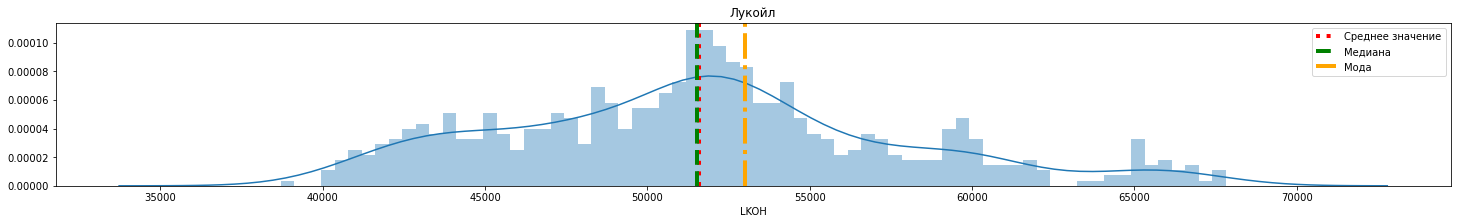

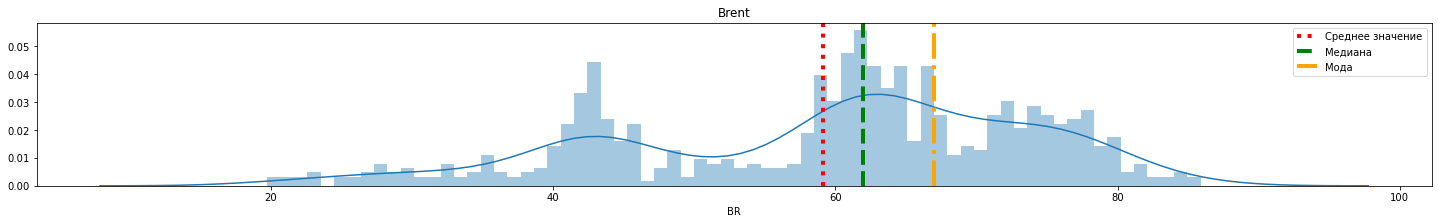

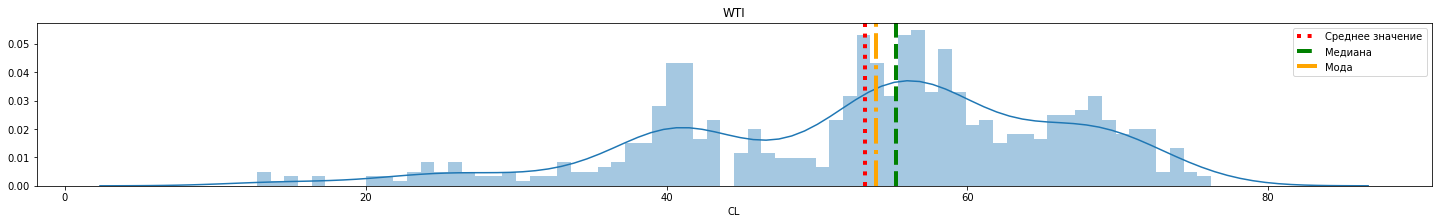

In [79]:
distrib_plot(df['LKOH'], 'Лукойл')
distrib_plot(df['BR'], 'Brent')
distrib_plot(df['CL'], 'WTI')

#### Уравнение регрессии x=BR, y=LKOH

Уравнение регрессии: y = 51071.4 + 8.88*x

R2: 0.0004480802350996432
Ковариация: 1866.6355665328683
Корреляция: 0.021167905779735662


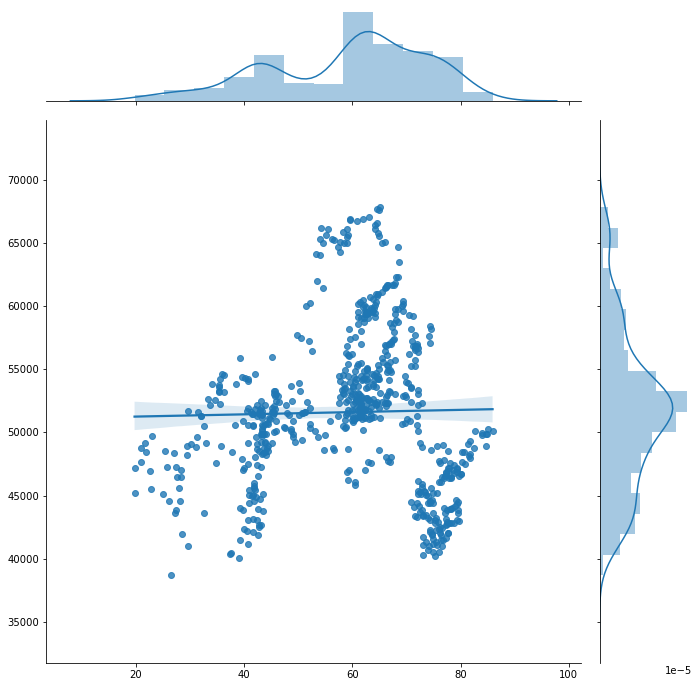

In [80]:
calc_regression(df['BR'], df['LKOH'])

#### Уравнение регрессии x=CL, y=LKOH

Уравнение регрессии: y = 51277.95 + 5.99*x

R2: 0.00015841253841675725
Ковариация: 978.4702081519614
Корреляция: 0.012586204289480216


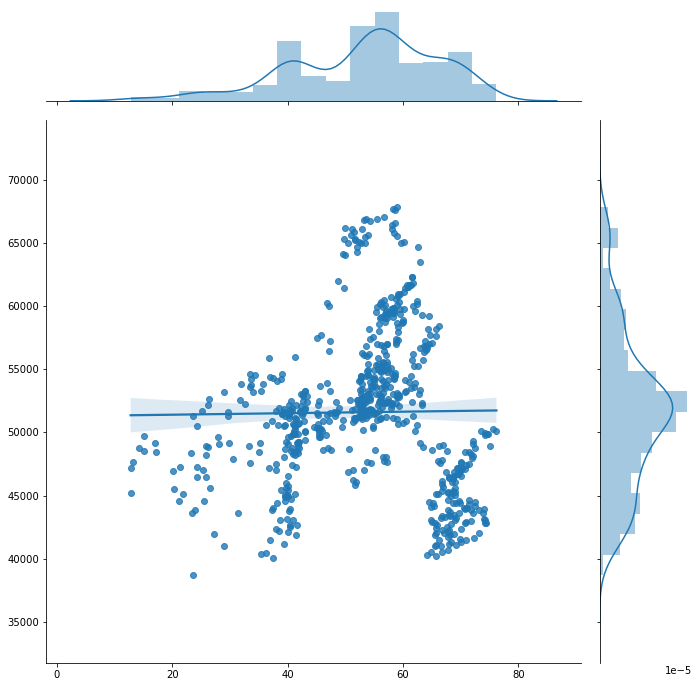

In [81]:
calc_regression(df['CL'], df['LKOH'])

#### Уравнение регрессии x=BR, y=CL

Уравнение регрессии: y = 1.61 + 0.87*x

R2: 0.9781668168471889
Ковариация: 183.37131751483975
Корреляция: 0.9890231629477568


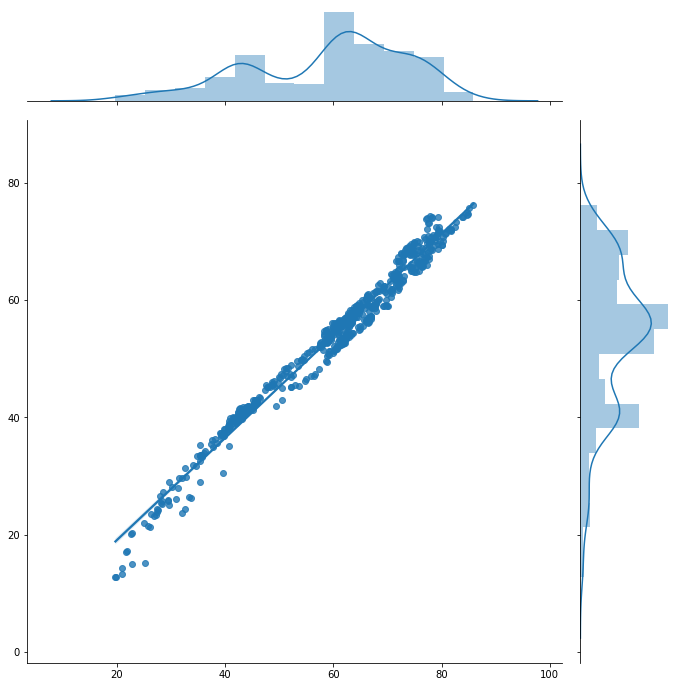

In [82]:
calc_regression(df['BR'], df['CL'])

### Итог: между фьючерсами LKOH/BR и LKOH/CL корреляции нет. Хорошо коррелируют между собой инструменты BR и CL.